<div style="background-color: #ffffff; color: #333; padding: 15px; border: 1px solid #ddd; border-radius: 8px;">
    <a class="anchor" id="1st-bullet"></a>
    <h2 style="color: #795548; font-weight: bold; text-align: center;">Group Project - Feature Selection</h2>
    <h3 style="color: #a1887f; text-align: center;">Data Mining 2024/2025</h3>
</div>

<div style="text-align: center;">
    <strong>Group 14</strong>
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Francisco Santos</td>
            <td style="border: 1px solid white; padding: 8px;">20240562</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Margarida Raposo</td>
            <td style="border: 1px solid white; padding: 8px;">20241020</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Nuno Nunes</td>
            <td style="border: 1px solid white; padding: 8px;">20240560</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Teresa Menezes</td>
            <td style="border: 1px solid white; padding: 8px;">20240333</td>
        </tr>
    </table>
</div>

### **Structure**
1. [Change](#add)
2. [Change](#add)

In [36]:
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from minisom import MiniSom

from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.cluster import KMeans

# To create hexagons
from matplotlib.patches import RegularPolygon

# Plotting
from matplotlib import cm # For colormap handling
import matplotlib.colors as mpl_colors
from matplotlib import colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable # For axe customization

In [43]:
df = pd.read_csv('df2.csv', index_col='customer_id')

In [44]:
df.head()

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360          18.0             2              5   
5d272b9dcb             8670          17.0             2              2   
f6d1b2ba63             4660          38.0             1              2   
180c632ed8             4660          26.0             2              3   
4eb37a6705             4660          20.0             2              5   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
1b8f824d5e          1          0.0           1   DELIVERY           DIGI   
5d272b9dcb          2          0.0           1   DISCOUNT           DIGI   
f6d1b2ba63          2          0.0           1   DISCOUNT           CASH   
180c632ed8          1          0.0           2   DELIVERY           DIGI   
4eb37a6705          0          0.0           2          -           DIGI   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00            0.0       0.0   
5d272b9dcb          12.82       6.39            0.0       0.0   
f6d1b2ba63           9.20       0.00            0.0       0.0   
180c632ed8           0.00      13.70            0.0       0.0   
4eb37a6705          14.57      40.87            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0           0.0          0.0   
5d272b9dcb                  0.0          0.0           0.0          0.0   
f6d1b2ba63                  0.0          0.0           0.0          0.0   
180c632ed8                  0.0          0.0           0.0          0.0   
4eb37a6705                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88          0.0           0.0                0.0   
5d272b9dcb         0.00          0.0           0.0                0.0   
f6d1b2ba63         0.00          0.0           0.0                0.0   
180c632ed8        17.86          0.0           0.0                0.0   
4eb37a6705         0.00          0.0           0.0                0.0   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  DOW_0  DOW_1  \
customer_id                                                                
1b8f824d5e         0.0                       0.0       0.0      1      0   
5d272b9dcb         0.0                       0.0       0.0      1      0   
f6d1b2ba63         0.0                       0.0       0.0      1      0   
180c632ed8         0.0                       0.0       0.0      0      1   
4eb37a6705         0.0                       0.0       0.0      0      1   

             DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_2  HR_3  HR_4  \
customer_id                                                                    
1b8f824d5e       0      0      0      0      1   0.0     0     0     0     0   
5d272b9dcb       0      0      0      0      1   0.0     0     0     0     0   
f6d1b2ba63       0      0      0      0      1   0.0     0     0     0     0   
180c632ed8       0      0      0      0      1   0.0     0     0     0     0   
4eb37a6705       0      0      0      0      1   0.0     0     0     0     0   

             HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  \
customer_id                                                                    
1b8f824d5e      0     0     0     0     0      0      0      0      0      0   
5d272b9dcb      0     0     0     0     0      1      1      0      0      0   
f6d1b2ba63      0     0     0     0     1      0    

In [45]:
# select columns representing orders per hour (HR_0 to HR_23)
orders_per_hour = df.loc[:, 'HR_0':'HR_23']

# calculate the total number of orders for different times of the day
dawn = sum(df.loc[:, 'HR_0':'HR_6'].sum())  # Sum of orders from 12 AM to 6 AM
morning = sum(df.loc[:, 'HR_7':'HR_12'].sum())  # Sum of orders from 7 AM to 12 PM
afternoon = sum(df.loc[:, 'HR_13':'HR_18'].sum())  # Sum of orders from 1 PM to 6 PM
night = sum(df.loc[:, 'HR_19':'HR_23'].sum())  # Sum of orders from 7 PM to 11 PM

# organize total orders for each time of the day in a list
orders_per_moment_of_day = [dawn, morning, afternoon, night]

# select columns representing orders per day of the week (DOW_0 to DOW_6)
orders_per_dow = df.loc[:, 'DOW_0':'DOW_6']

# calculate the sum of orders for each day of the week
orders_per_dow_sum = orders_per_dow.sum()

# select columns representing the amount spent per cuisine type (CUI_American to CUI_Thai)
amount_spent_per_cuisine = df.loc[:, 'CUI_American':'CUI_Thai']

# calculate the sum of the amount spent for each cuisine type
amount_spent_per_cuisine_sum = amount_spent_per_cuisine.sum()

In [46]:
df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_amount_spent',
       'age_group', 'customer_city', 'total_orders', 'days_since_last_order',
       'customer_lifecycle_stage', 'vendor_loyalty_score', 'peak_order_day',
       'peak_order_hour', 'cuisine_variety', 'available_cuisines_city',
       'relative_cuisine_v

# Correlation Matrix

In [54]:
categorical_features = ['customer_region', 'last_promo', 'payment_method','age_group', 'customer_city', 
                        'customer_lifecycle_stage','peak_order_day','peak_order_hour','available_cuisines_city']

In [55]:
columns_to_drop = list(orders_per_hour.columns) + list(orders_per_dow.columns) + list(amount_spent_per_cuisine.columns) + categorical_features
df_corr = df.drop(columns_to_drop, axis=1)

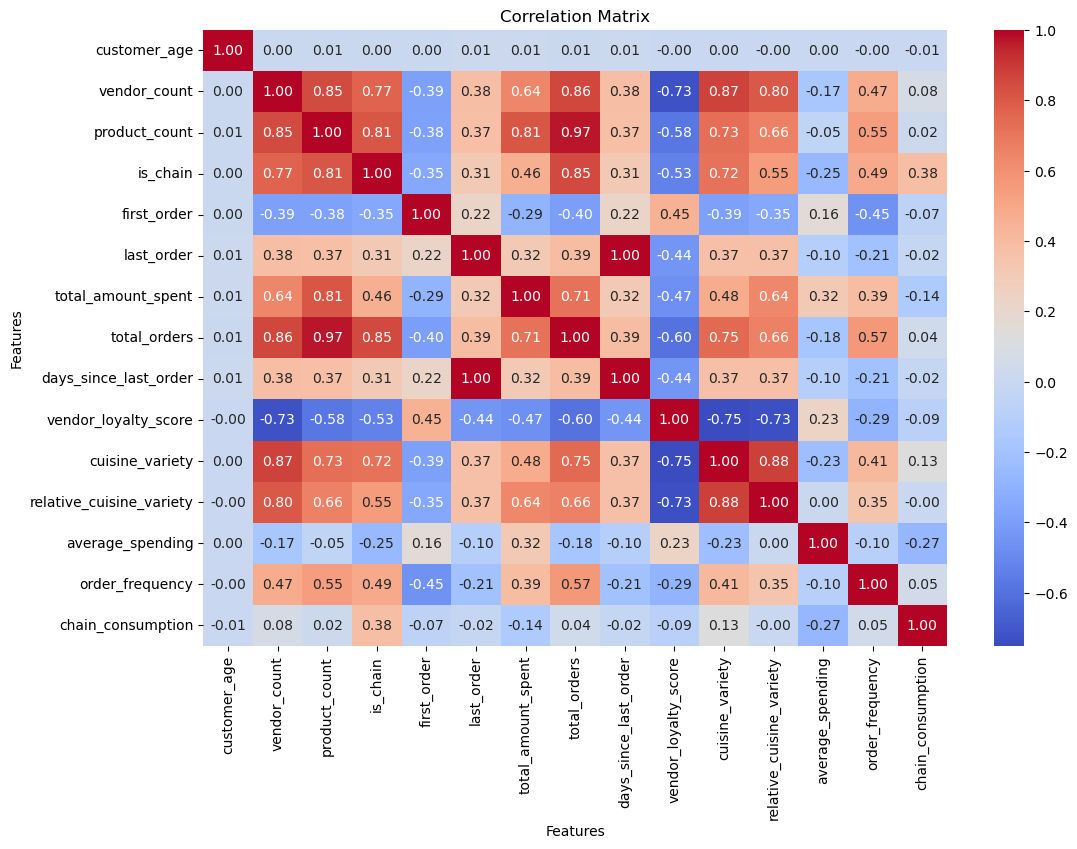

In [57]:
correlation_matrix = df_corr.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

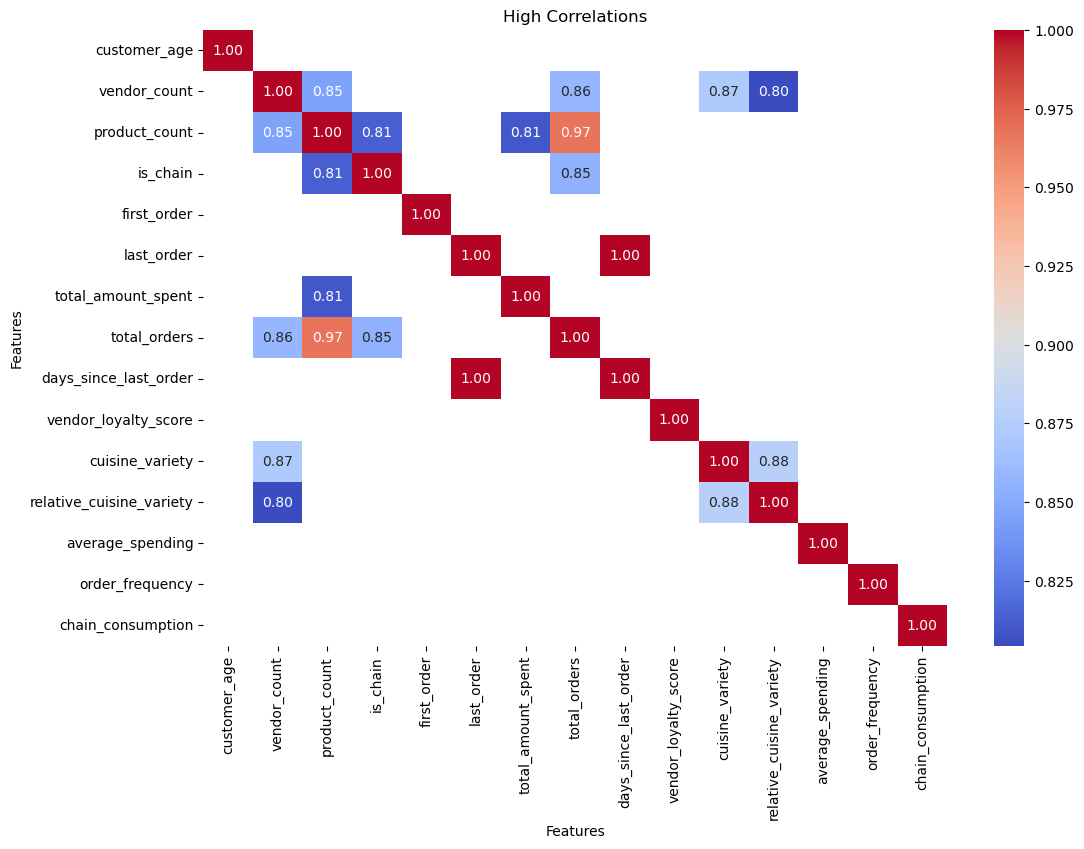

In [58]:
# Compute the correlation matrix
correlation_matrix = df_corr.corr()

# Filter the correlations above 0.8
high_corr_matrix = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with only high correlations
sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=high_corr_matrix.isna())

# Adding titles and labels
plt.title('High Correlations')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [59]:
df_corr.drop(['vendor_count', 'product_count', 'is_chain', 'last_order', 'cuisine_variety'], axis=1, inplace=True)

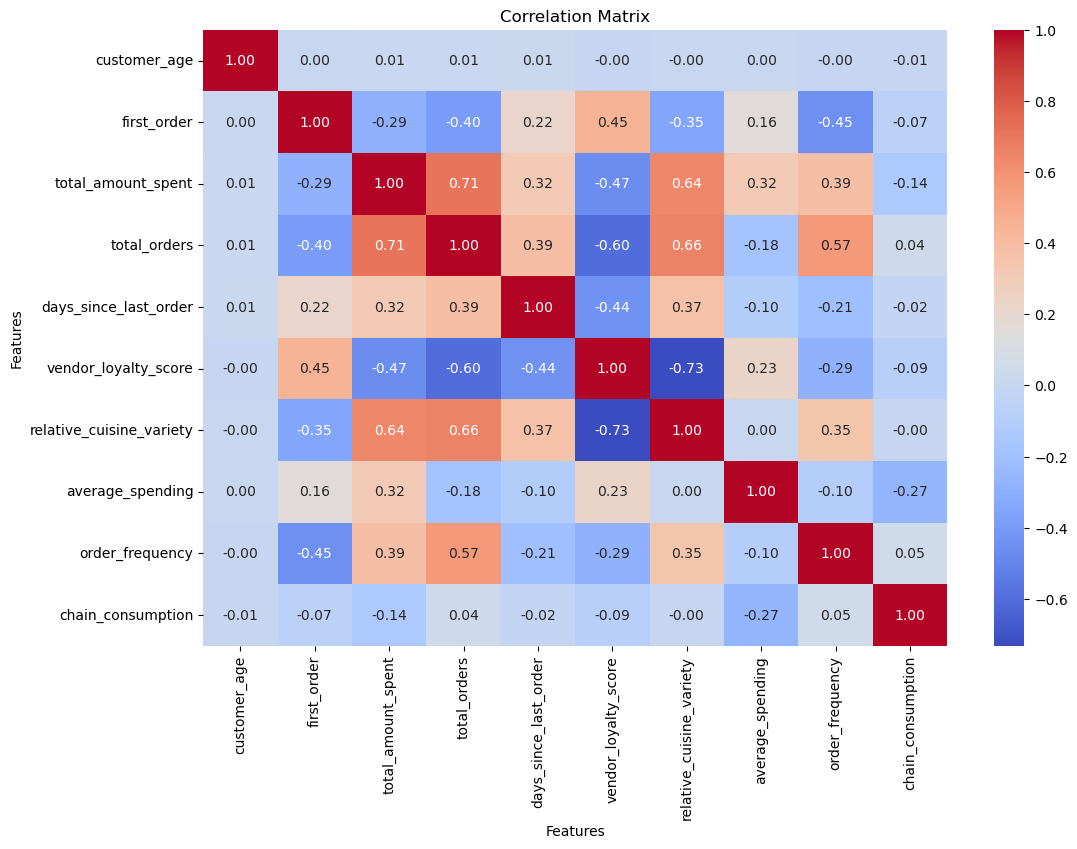

In [60]:
correlation_matrix = df_corr.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Adding titles and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [61]:
df_corr.columns

Index(['customer_age', 'first_order', 'total_amount_spent', 'total_orders',
       'days_since_last_order', 'vendor_loyalty_score',
       'relative_cuisine_variety', 'average_spending', 'order_frequency',
       'chain_consumption'],
      dtype='object')

# Perspectives

**Preference-based** - vendor_loyalty_score, relative_cuisine_variety, chain_consumption

**Behavioral** - first_order, days_since_last_order, order_frequency, total_orders, total_amount_spent, average_spending

In [62]:
preferences = df[['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']]

behaviors = df[['first_order','days_since_last_order', 'order_frequency', 'total_orders', 
                'total_amount_spent', 'average_spending']]

## Self-Organizing Maps

### Preference-based Perspective

In [202]:
# Deciding the grid size for the SOM using a formula based on the number of rows in the dataset
grid_size = 5 * (preferences.shape[0] ** 0.5)

print(f'The product of M and N should be close to {round(grid_size,2)}')
print(f'Thus M and N should be close to {round(grid_size ** 0.5,2)}')

The product of M and N should be close to 886.02
Thus M and N should be close to 29.77


c:\Users\marga\Documents\anaconda\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
c:\Users\marga\Documents\anaconda\Lib\site-packages\numpy\linalg\linalg.py:2542: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
c:\Users\marga\Documents\anaconda\Lib\site-packages\numpy\linalg\linalg.py:2541: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
c:\Users\marga\Documents\anaconda\Lib\site-packages\minisom.py:405: RuntimeWarning: overflow encountered in add
  self._weights += einsum('ij, ijk->ijk', g, x-self._weights)
c:\Users\marga\Documents\anaconda\Lib\site-packages\minisom.py:629: RuntimeWarning: overflow encountered in power
  weights_flat_sq = power(weights_flat, 2).sum(axis=1, keepdims=True)
c:\Users\marga\Documents\anaconda\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in a

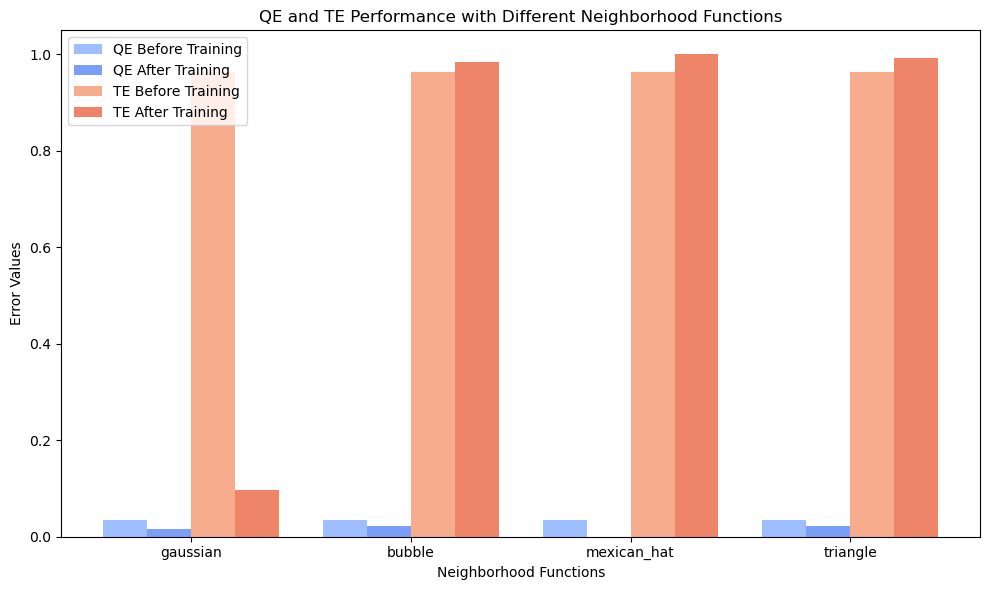

In [203]:
# Comparing the performance of different neighborhood functions
som_data = preferences.values

sigma = 1
learning_rate = 0.9 # the learning rate value was chosen by experimenting and comparing QE and TE values
M = 30
N = 30  
n_feats = len(preferences.columns) # Number of features used in the SOM

# List of neighborhood functions to test
neighborhood_functions = ['gaussian', 'bubble', 'mexican_hat', 'triangle']

# Lists to store QE and TE values for each neighborhood function
qe_values = []
te_values = []

# Train the SOM with each neighborhood function
for func in neighborhood_functions:
    sm = MiniSom(M, N, n_feats,
                 sigma=sigma, 
                 neighborhood_function=func, 
                 learning_rate=learning_rate, 
                 topology='hexagonal', 
                 random_seed=42)
    
    # Initialize the weights of the SOM picking random samples from data
    sm.random_weights_init(som_data)
    
    # Errors before training
    qe_before = sm.quantization_error(som_data)
    te_before = sm.topographic_error(som_data)
    
    # Train the SOM
    sm.train_batch(preferences.values,
                   num_iteration=50000)
    
    # Errors after training
    qe_after = sm.quantization_error(som_data)
    te_after = sm.topographic_error(som_data)
    
    # Store QE and TE values after training
    qe_values.append((qe_before, qe_after))
    te_values.append((te_before, te_after))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot QE and TE for each neighborhood function
width = 0.2  # Width of the bars
x_pos = np.arange(len(neighborhood_functions))  # Position for each neighborhood function

# Use coolwarm colormap to color the bars
cmap = cm.coolwarm
qe_before_color = cmap(0.3)
qe_after_color = cmap(0.2)
te_before_color = cmap(0.7)
te_after_color = cmap(0.8)   

# Plot QE values
ax.bar(x_pos - width, [qe[0] for qe in qe_values], width, label="QE Before Training", color=qe_before_color)
ax.bar(x_pos, [qe[1] for qe in qe_values], width, label="QE After Training", color=qe_after_color)

# Plot TE values
ax.bar(x_pos + width, [te[0] for te in te_values], width, label="TE Before Training", color=te_before_color)
ax.bar(x_pos + 2*width, [te[1] for te in te_values], width, label="TE After Training", color=te_after_color)

# Customize plot
ax.set_xlabel('Neighborhood Functions')
ax.set_ylabel('Error Values')
ax.set_title('QE and TE Performance with Different Neighborhood Functions')
ax.set_xticks(x_pos + width / 2)  # Align tick labels with the grouped bars
ax.set_xticklabels(neighborhood_functions)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()

In [204]:
# Actual training of the SOM and exact error values

sigma = 1
learning_rate = 0.9 # the learning rate value was chosen by experimenting and comparing QE and TE values
num_iteration = 5
M = 30
N = 30

sm = MiniSom(
   M, N, len(preferences.columns),
   sigma=sigma,
   learning_rate=learning_rate,
   neighborhood_function='gaussian', # According to the previous plot, the gaussian function performed better
   topology = 'hexagonal', # Both hexagonal and rectangular topologies were tested, hexagonal performed better
   random_seed=42)

sm.random_weights_init(preferences.values)
initial_qe = sm.quantization_error(preferences.values)
initial_te = sm.topographic_error(preferences.values)

sm.train(preferences.values,
           use_epochs=True,
           random_order=True,
           num_iteration=num_iteration)

final_qe = sm.quantization_error(preferences.values)
final_te = sm.topographic_error(preferences.values)

print(f'Intital quantization error vs After training {np.round([initial_qe, final_qe], 4)}')
print(f'Intital topographic error vs After training {np.round([initial_te, final_te], 4)}')

Intital quantization error vs After training [0.0337 0.0153]
Intital topographic error vs After training [0.964  0.0525]


In [205]:
# What are these weights?
weights = sm.get_weights()
weights.shape

(30, 30, 3)

In [206]:
def plot_hexagons(som,              # Trained SOM model 
                  sf,               # matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Greys,    # colormap to use
                  annot=False):     

    
    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            wx, wy = som.convert_map_to_euclidean((i,j)) 

            hex = RegularPolygon((wx, wy), 
                                numVertices=6, 
                                radius= np.sqrt(1/3),
                                facecolor=cmap(colornorm(matrix_vals[i, j])), 
                                alpha=1, 
                                edgecolor='white',
                                linewidth=.5)
            axs.add_patch(hex)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx,wy, annot_val, 
                        ha='center', va='center', 
                        fontsize='small')


    ## Remove axes for hex plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    

    # ## Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    ## Create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    # Add colorbar to plot
    sf.add_axes(ax_cb)

    return sf 

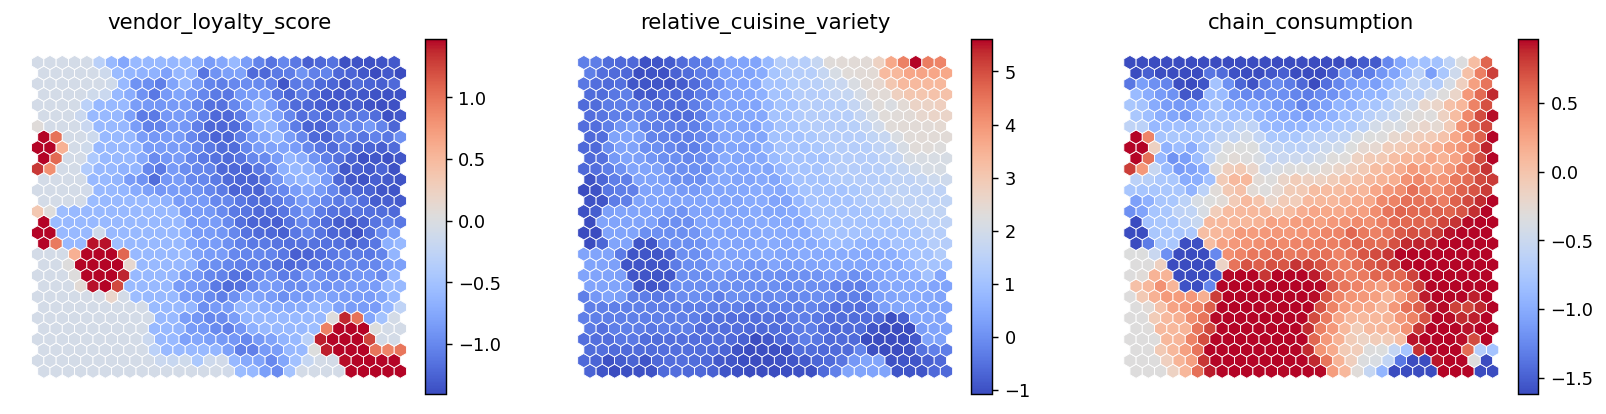

In [207]:
figsize=(12, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128)

subfigs = fig.subfigures(1, 3, wspace=0.2, hspace=0.4) 

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(preferences.columns)), subfigs.flatten()):
    
    matrix_vals = weights[:, :, cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
    # colornorm = mpl_colors.CenteredNorm(vcenter=0, halfrange=vext)

    sf = plot_hexagons(
        sm, sf, 
        colornorm,
        matrix_vals,
        label=preferences.columns[cpi],
        cmap=cm.coolwarm)

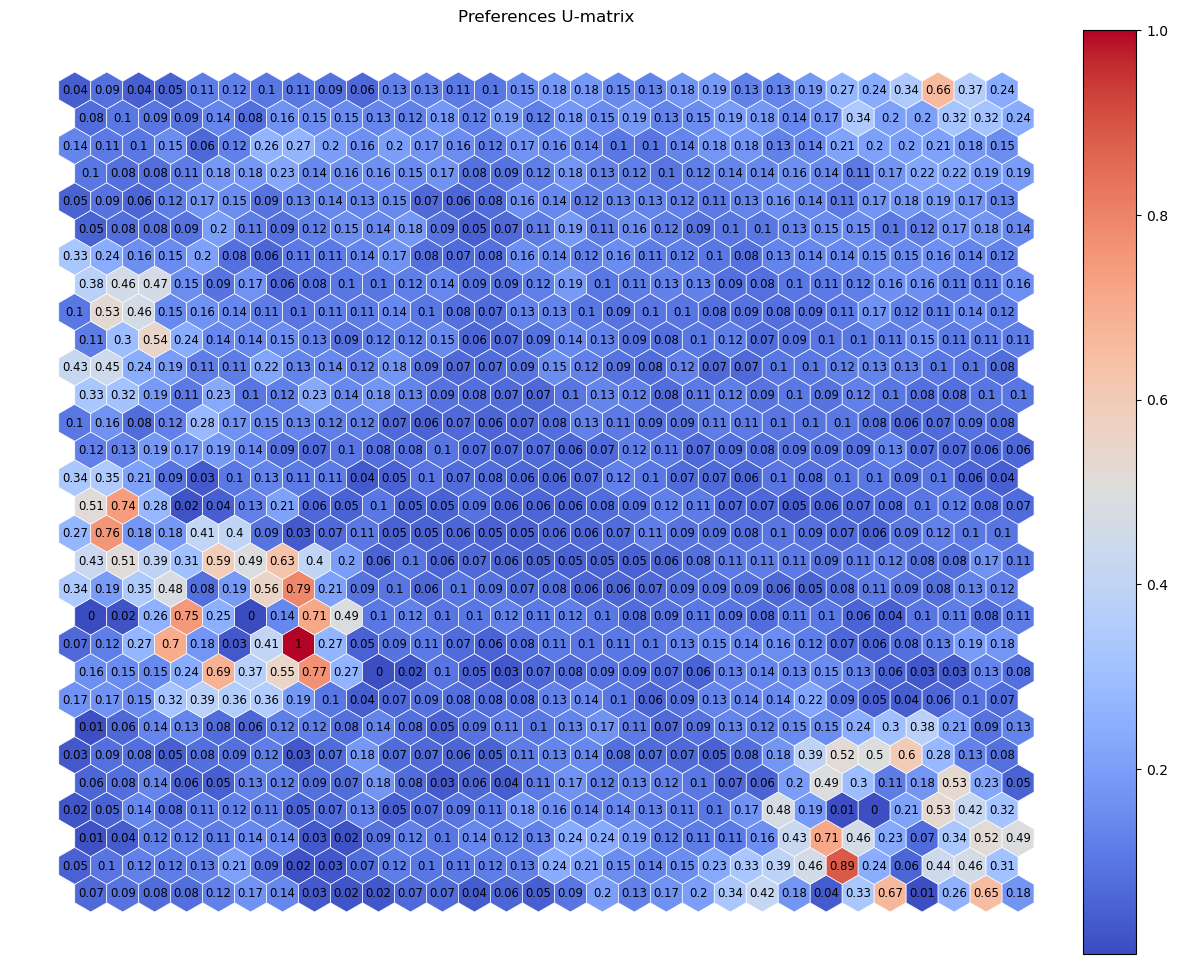

In [208]:
umatrix = sm.distance_map(scaling='mean')
fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    umatrix,
                    label="Preferences U-matrix",
                    cmap=cm.coolwarm,
                    annot=True)

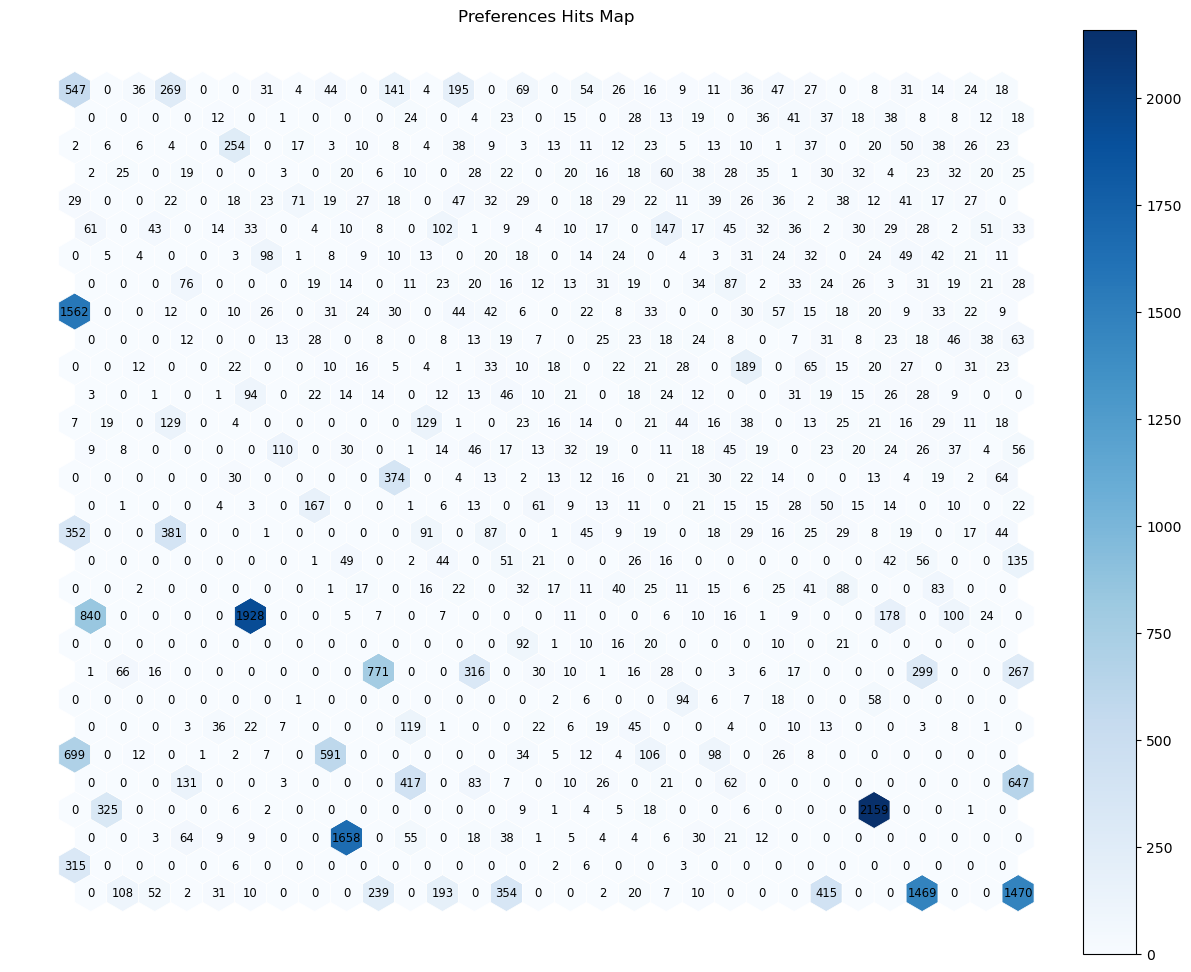

In [209]:
hitsmatrix = sm.activation_response(preferences.values)


fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    hitsmatrix,
                    label="Preferences Hits Map",
                    cmap=cm.Blues,
                    annot=True)

In [210]:
range_clusters = range(1, 10)
inertia = []
for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(preferences)
    inertia.append(kmclust.inertia_)

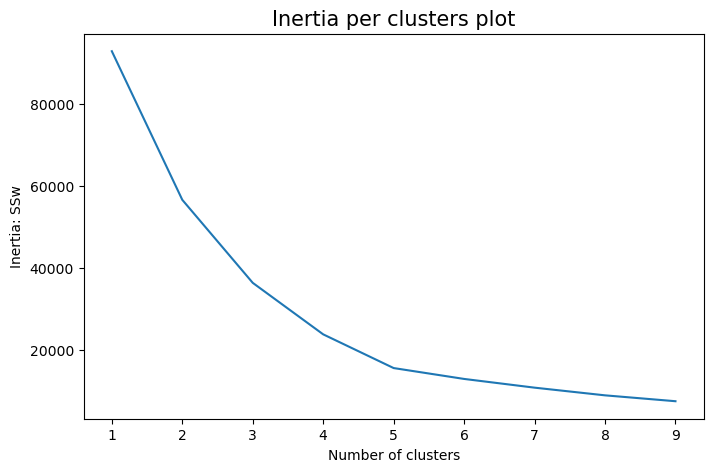

In [211]:
# Plotting inertia

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia per clusters plot", size=15)

plt.show()

In [212]:
weights_flat = sm.get_weights().reshape((M*N),len(preferences.columns))
weights_flat.shape

(900, 3)

In [213]:
# Perform K-Means clustering on top of the SOM weights
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=20, random_state=42)
kmeans_labels = kmeans.fit_predict(weights_flat)

c:\Users\marga\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


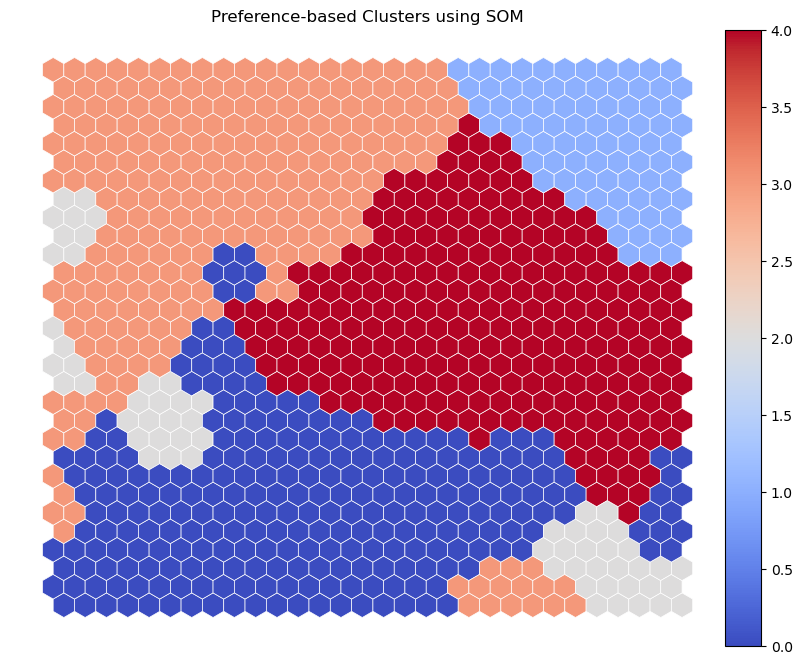

In [214]:
kmeans_matrix = kmeans_labels.reshape((M,N))

fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(kmeans_matrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    kmeans_matrix,
                    label="Preference-based Clusters using SOM",
                    cmap=cm.coolwarm)

In [215]:
# Evaluate the clustering quality using silhouette score and Davies-Bouldin index
som_preferences_score = silhouette_score(weights_flat, kmeans_labels, metric='euclidean')
# The silhouette score ranges from -1 to 1, where a higher value indicates better clustering
print(f'Silhouette Score: {round(som_preferences_score,3)}') 

som_preferences_index = davies_bouldin_score(weights_flat, kmeans_labels)
# The Davies-Bouldin index ranges from 0 to infinity, where a lower value indicates better clustering
print(f'Davies-Bouldin Index: {round(som_preferences_index,3)}') 

Silhouette Score: 0.334
Davies-Bouldin Index: 0.931


In [216]:
# Check the nodes and and respective clusters
nodes = weights_flat

df_nodes = pd.DataFrame(nodes, columns=preferences.columns)
df_nodes['som_cluster'] = kmeans_labels
df_nodes

vendor_loyalty_score  relative_cuisine_variety  chain_consumption  label
0               -0.076298                 -0.708761          -0.329127      0
1               -0.076298                 -0.616003          -0.329127      0
2               -0.076298                 -0.582722          -0.329126      0
3               -0.076298                 -0.549056          -0.329127      0
4               -0.076298                 -0.358280          -0.329121      3
..                    ...                       ...                ...    ...
895             -1.375911                  2.798112           0.718952      1
896             -1.366825                  3.177438           0.870885      1
897             -1.212429                  3.364675           0.537149      1
898             -1.408008                  3.687935           0.785004      1
899             -1.320609                  4.268954           0.615870      1

[900 rows x 4 columns]

In [217]:
# Getting BMU coordinates for each data point
bmu_index = np.array([sm.winner(x) for x in preferences.values])

print(bmu_index.shape)

bmu_index

(31401, 2)


array([[ 2,  0],
       [29,  4],
       [26,  0],
       ...,
       [ 5, 10],
       [26,  0],
       [25,  3]], dtype=int64)

In [218]:
som_final_labels = [kmeans_matrix[i[0]][i[1]] for i in bmu_index]

In [240]:
preferences_columns = preferences.columns.tolist()

df_preferences = preferences.copy()
df_preferences['som_cluster'] = som_final_labels

df_preferences.head()

vendor_loyalty_score  relative_cuisine_variety  chain_consumption  \
0             -0.076298                 -1.080237          -0.329127   
1             -0.076298                  0.378789           0.964013   
2              1.472881                 -0.947598           0.964013   
3             -0.076298                 -0.284404          -0.329127   
4             -0.076298                 -0.284404          -1.622266   

   som_cluster  
0            0  
1            0  
2            2  
3            3  
4            3

In [241]:
# Characterizing the final clusters
df_preferences[preferences_columns + ['som_cluster']].groupby('som_cluster').mean()

vendor_loyalty_score  relative_cuisine_variety  chain_consumption
som_cluster                                                                   
0                       -0.331621                 -0.340732           0.694027
1                       -1.219479                  2.549057          -0.072856
2                        1.472881                 -0.872392          -0.120836
3                       -0.392226                  0.054690          -0.966141
4                       -0.958315                  0.934822           0.332525

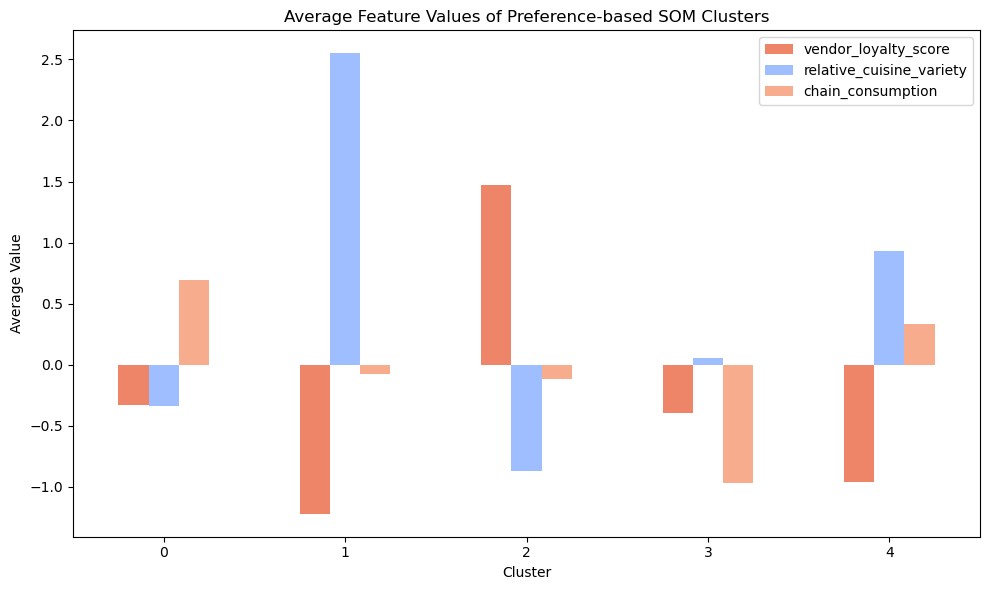

In [242]:
# Assuming 'df_preferences' already has the 'som_clusters' column and the features to plot
features = ['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']

# Group by 'som_clusters' and compute the mean
cluster_means = df_preferences[features + ['som_cluster']].groupby('som_cluster').mean()

# Use coolwarm colormap to color the bars
cmap = cm.coolwarm
vendor_loyalty_score_color = cmap(0.8)
relative_cuisine_variety_color = cmap(0.3)
chain_consumption_color = cmap(0.7)

colors = [vendor_loyalty_score_color, relative_cuisine_variety_color, chain_consumption_color]

# Plotting the bar plot
ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Preference-based SOM Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Analysing the appropriateness of our solution using R²

In [243]:
# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_preferences)  # get total sum of squares
ssw_labels = df_preferences[preferences_columns + ['som_cluster']].groupby('som_cluster').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
round(r2, 3)

0.822

### Behavioral Perspective

c:\Users\marga\Documents\anaconda\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
c:\Users\marga\Documents\anaconda\Lib\site-packages\numpy\linalg\linalg.py:2542: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
c:\Users\marga\Documents\anaconda\Lib\site-packages\numpy\linalg\linalg.py:2541: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
c:\Users\marga\Documents\anaconda\Lib\site-packages\minisom.py:629: RuntimeWarning: overflow encountered in power
  weights_flat_sq = power(weights_flat, 2).sum(axis=1, keepdims=True)
c:\Users\marga\Documents\anaconda\Lib\site-packages\minisom.py:191: UserWarning: triangle neighborhood function does not take in account hexagonal topology
  warn('triangle neighborhood function does not ' +


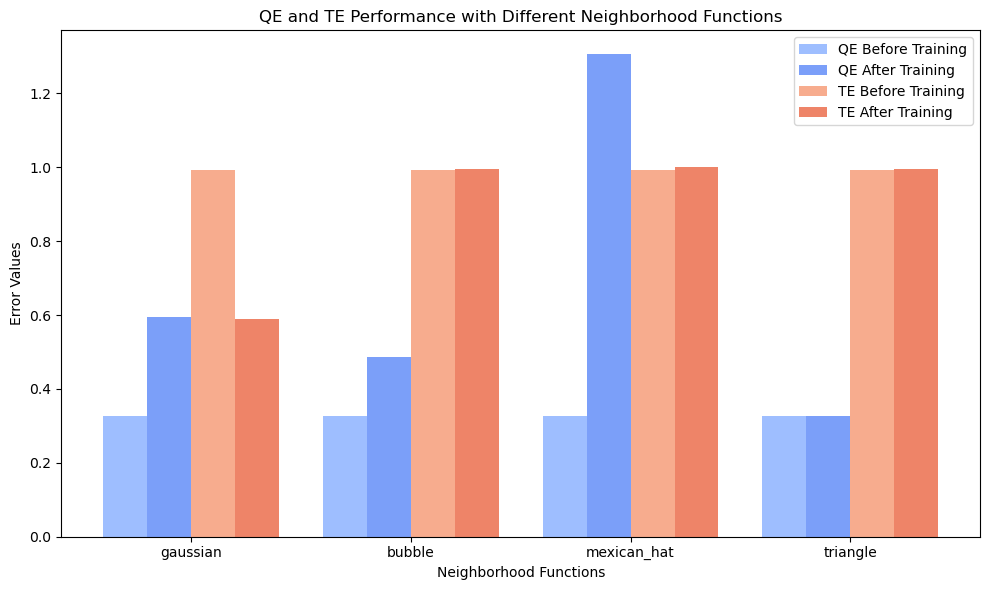

In [246]:
# Comparing the performance of different neighborhood functions
som_data = behaviors.values

sigma = 1
learning_rate = 0.9 # the learning rate value was chosen by experimenting and comparing QE and TE values
M = 30
N = 30  
n_feats = len(behaviors.columns) # Number of features used in the SOM

# List of neighborhood functions to test
neighborhood_functions = ['gaussian', 'bubble', 'mexican_hat', 'triangle']

# Lists to store QE and TE values for each neighborhood function
qe_values = []
te_values = []

# Train the SOM with each neighborhood function
for func in neighborhood_functions:
    sm = MiniSom(M, N, n_feats,
                 sigma=sigma, 
                 neighborhood_function=func, 
                 learning_rate=learning_rate, 
                 topology='hexagonal', 
                 random_seed=42)
    
    # Initialize the weights of the SOM picking random samples from data
    sm.random_weights_init(som_data)
    
    # Errors before training
    qe_before = sm.quantization_error(som_data)
    te_before = sm.topographic_error(som_data)
    
    # Train the SOM
    sm.train_batch(behaviors.values,
                   num_iteration=50000)
    
    # Errors after training
    qe_after = sm.quantization_error(som_data)
    te_after = sm.topographic_error(som_data)
    
    # Store QE and TE values after training
    qe_values.append((qe_before, qe_after))
    te_values.append((te_before, te_after))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot QE and TE for each neighborhood function
width = 0.2  # Width of the bars
x_pos = np.arange(len(neighborhood_functions))  # Position for each neighborhood function

# Use coolwarm colormap to color the bars
cmap = cm.coolwarm
qe_before_color = cmap(0.3)
qe_after_color = cmap(0.2)
te_before_color = cmap(0.7)
te_after_color = cmap(0.8)   

# Plot QE values
ax.bar(x_pos - width, [qe[0] for qe in qe_values], width, label="QE Before Training", color=qe_before_color)
ax.bar(x_pos, [qe[1] for qe in qe_values], width, label="QE After Training", color=qe_after_color)

# Plot TE values
ax.bar(x_pos + width, [te[0] for te in te_values], width, label="TE Before Training", color=te_before_color)
ax.bar(x_pos + 2*width, [te[1] for te in te_values], width, label="TE After Training", color=te_after_color)

# Customize plot
ax.set_xlabel('Neighborhood Functions')
ax.set_ylabel('Error Values')
ax.set_title('QE and TE Performance with Different Neighborhood Functions')
ax.set_xticks(x_pos + width / 2)  # Align tick labels with the grouped bars
ax.set_xticklabels(neighborhood_functions)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()

In [252]:
# Actual training of the SOM and exact error values

sigma = 1
learning_rate = 0.3 # the learning rate value was chosen by experimenting and comparing QE and TE values
num_iteration = 5
M = 30
N = 30

sm = MiniSom(
   M, N, len(behaviors.columns),
   sigma=sigma,
   learning_rate=learning_rate,
   neighborhood_function='gaussian', # According to the previous plot, the gaussian function performed better
   topology = 'rectangular', # Both hexagonal and rectangular topologies were tested, hexagonal performed better
   random_seed=42)

sm.random_weights_init(behaviors.values)
initial_qe = sm.quantization_error(behaviors.values)
initial_te = sm.topographic_error(behaviors.values)

sm.train(behaviors.values,
           use_epochs=True,
           random_order=True,
           num_iteration=num_iteration)

final_qe = sm.quantization_error(behaviors.values)
final_te = sm.topographic_error(behaviors.values)

print(f'Intital quantization error vs After training {np.round([initial_qe, final_qe], 4)}')
print(f'Intital topographic error vs After training {np.round([initial_te, final_te], 4)}')

Intital quantization error vs After training [0.3262 0.2611]
Intital topographic error vs After training [0.991  0.2861]


In [253]:
# What are these weights?
weights = sm.get_weights()
weights.shape

(30, 30, 6)

In [280]:
from matplotlib.patches import Rectangle

def plot_rectangles(som,              # Trained SOM model 
                  sf,               # matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Greys,    # colormap to use
                  annot=False):     
    
    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            # Convert SOM grid positions to Euclidean coordinates
            wx, wy = som.convert_map_to_euclidean((i,j)) 

            # Create a rectangle instead of a hexagon
            rect = Rectangle((wx - 0.5, wy - 0.5), 1, 1,  # Rectangle with size 1x1
                             facecolor=cmap(colornorm(matrix_vals[i, j])), 
                             alpha=1, 
                             edgecolor='white',
                             linewidth=.5)
            axs.add_patch(rect)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx, wy, annot_val, 
                         ha='center', va='center', 
                         fontsize='small')

    ## Remove axes for rectangle plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    # ## Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    ## Create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    # Add colorbar to plot
    sf.add_axes(ax_cb)

    return sf

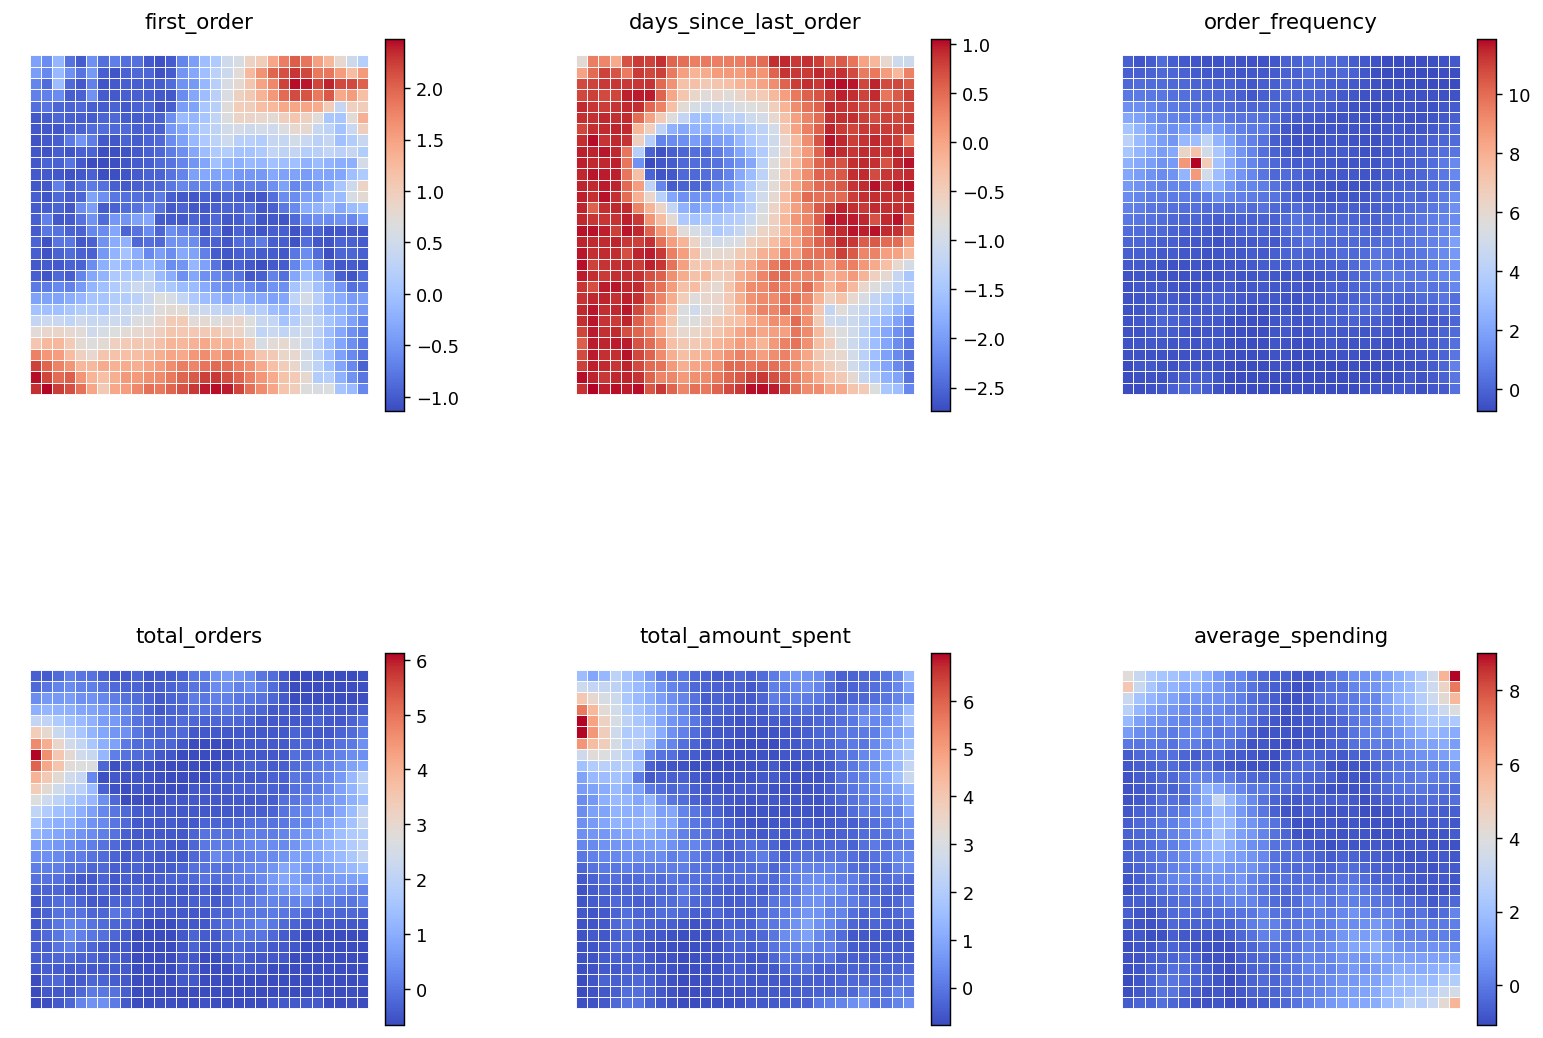

In [281]:
figsize=(12, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128)

subfigs = fig.subfigures(2, 3, wspace=0.2, hspace=0.4) 

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(behaviors.columns)), subfigs.flatten()):
    
    matrix_vals = weights[:, :, cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))

    sf = plot_rectangles(
        sm, sf, 
        colornorm,
        matrix_vals,
        label=behaviors.columns[cpi],
        cmap=cm.coolwarm)

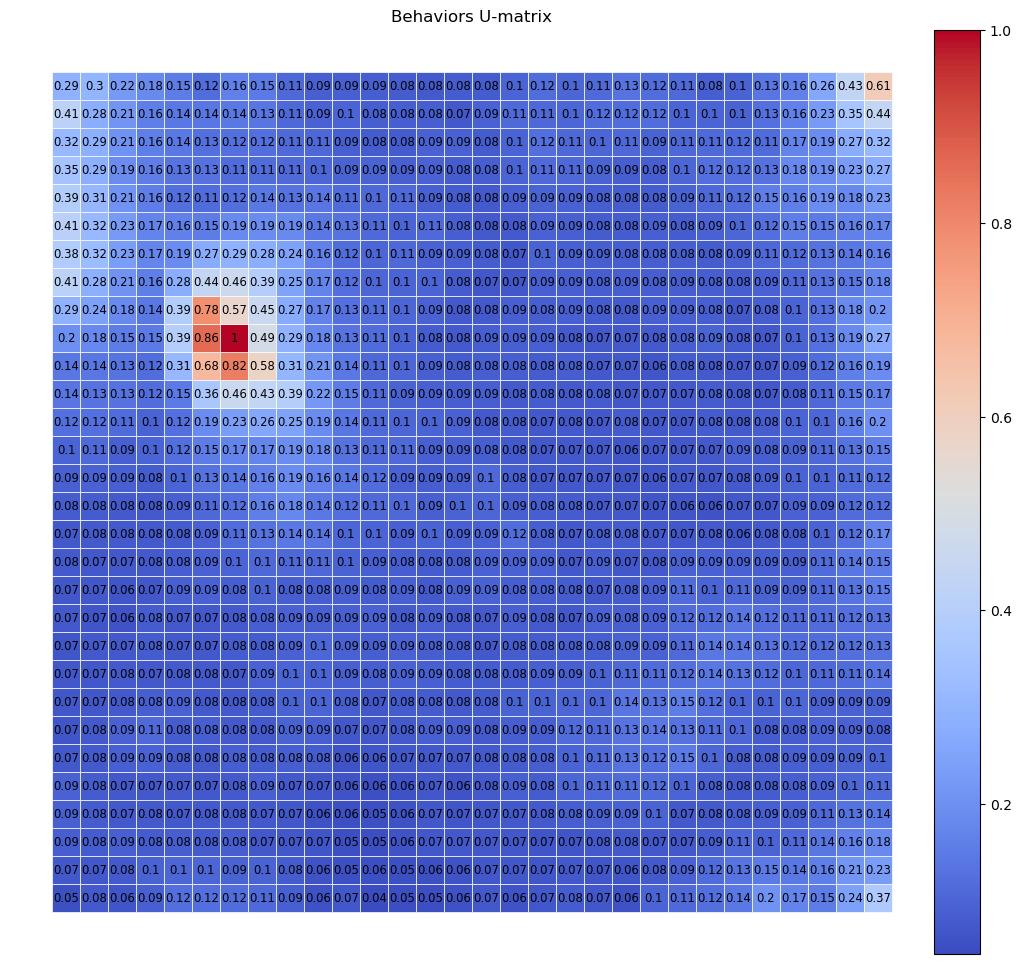

In [282]:
umatrix = sm.distance_map(scaling='mean')
fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))

fig = plot_rectangles(sm, fig, 
                    colornorm,
                    umatrix,
                    label="Behaviors U-matrix",
                    cmap=cm.coolwarm,
                    annot=True)

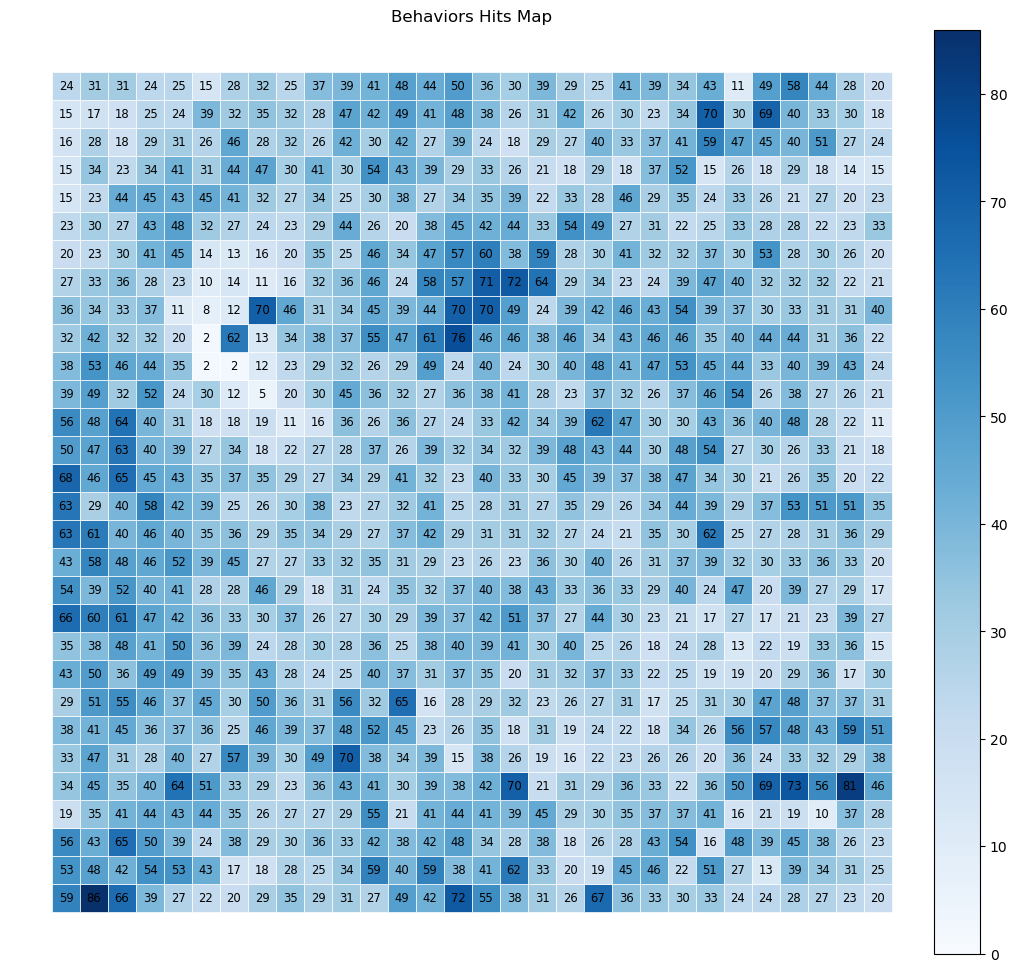

In [283]:
hitsmatrix = sm.activation_response(behaviors.values)


fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))

fig = plot_rectangles(sm, fig, 
                    colornorm,
                    hitsmatrix,
                    label="Behaviors Hits Map",
                    cmap=cm.Blues,
                    annot=True)

In [257]:
range_clusters = range(1, 10)
inertia = []
for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(behaviors)
    inertia.append(kmclust.inertia_)

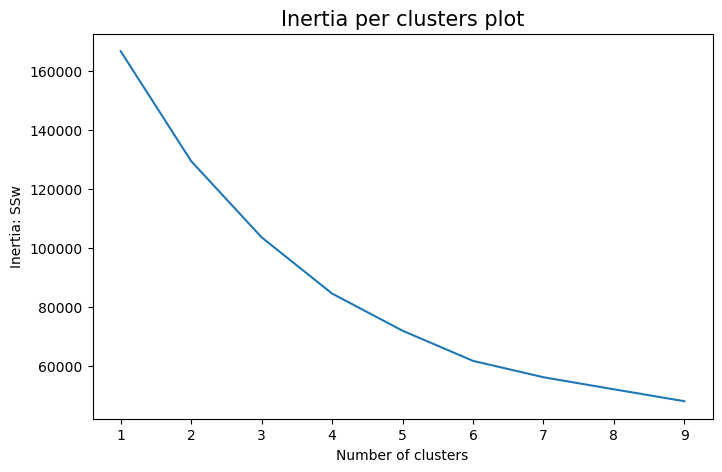

In [258]:
# Plotting inertia

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia per clusters plot", size=15)

plt.show()

In [266]:
behaviors_weights_flat = sm.get_weights().reshape((M*N),len(behaviors.columns))
behaviors_weights_flat.shape

(900, 6)

In [267]:
# Perform K-Means clustering on top of the SOM weights
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=20, random_state=42)
kmeans_behaviors_labels = kmeans.fit_predict(behaviors_weights_flat)

c:\Users\marga\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


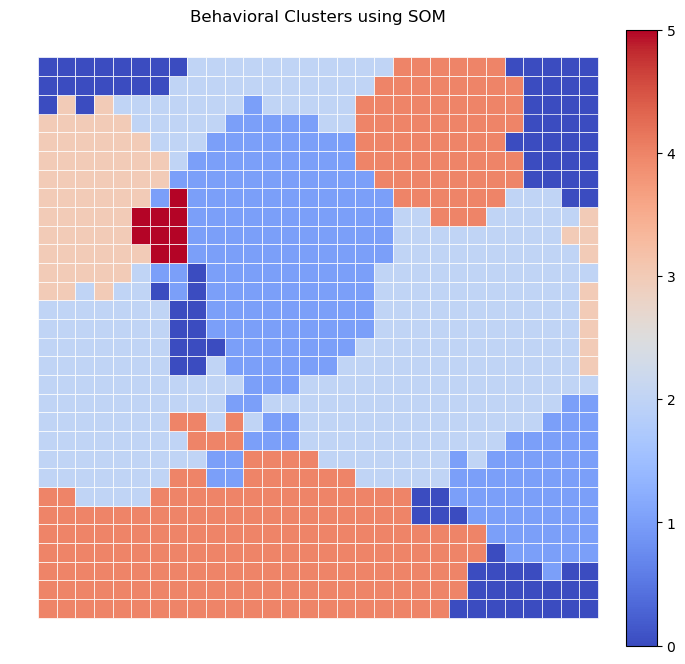

In [284]:
kmeans_matrix = kmeans_behaviors_labels.reshape((M,N))

fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(kmeans_matrix))

fig = plot_rectangles(sm, fig, 
                    colornorm,
                    kmeans_matrix,
                    label="Behavioral Clusters using SOM",
                    cmap=cm.coolwarm)

In [269]:
# Evaluate the clustering quality using silhouette score and Davies-Bouldin index
som_behaviors_score = silhouette_score(behaviors_weights_flat, kmeans_behaviors_labels, metric='euclidean')
# The silhouette score ranges from -1 to 1, where a higher value indicates better clustering
print(f'Silhouette Score: {round(som_behaviors_score,3)}') 

som_behaviors_index = davies_bouldin_score(behaviors_weights_flat, kmeans_behaviors_labels)
# The Davies-Bouldin index ranges from 0 to infinity, where a lower value indicates better clustering
print(f'Davies-Bouldin Index: {round(som_behaviors_index,3)}') 

Silhouette Score: 0.289
Davies-Bouldin Index: 0.985


In [272]:
# Check the nodes and and respective clusters
behavior_nodes = behaviors_weights_flat

df_behaviors_nodes = pd.DataFrame(behavior_nodes, columns=behaviors.columns)
df_behaviors_nodes['som_cluster'] = kmeans_behaviors_labels
df_behaviors_nodes

first_order  days_since_last_order  order_frequency  total_orders  \
0       2.315823               0.879894        -0.736130     -0.665676   
1       2.441035               1.015516        -0.738810     -0.662427   
2       2.223518               0.799685        -0.715592     -0.641982   
3       1.784036               0.728062        -0.564520     -0.445878   
4       1.098123               0.590888        -0.503757     -0.381816   
..           ...                    ...              ...           ...   
895     0.987562               0.722736        -0.250545     -0.030584   
896     1.186275               0.800885        -0.499770     -0.349413   
897     2.025617               0.618456        -0.704940     -0.640911   
898     1.573343               0.306913        -0.664731     -0.614099   
899     0.200901              -1.064864        -0.370077     -0.605576   

     total_amount_spent  average_spending  som_cluster  
0             -0.724787         -0.699731            4  
1             -0.770715         -0.977937            4  
2             -0.779448         -1.060329            4  
3             -0.717283         -0.996774            4  
4             -0.677330         -0.938500            4  
..                  ...               ...          ...  
895            1.789805          2.393115            0  
896            1.439844          3.892850            0  
897            0.485360          5.603723            0  
898            1.000765          7.247367            0  
899            1.433494          9.008401            0  

[900 rows x 7 columns]

In [273]:
# Getting BMU coordinates for each data point
bmu_index = np.array([sm.winner(x) for x in behaviors.values])

print(bmu_index.shape)

bmu_index

(31401, 2)


array([[ 6, 20],
       [ 6, 20],
       [ 6, 20],
       ...,
       [24, 27],
       [24, 27],
       [ 0,  1]], dtype=int64)

In [274]:
som_final_behavior_labels = [kmeans_matrix[i[0]][i[1]] for i in bmu_index]

In [275]:
behaviors_columns = behaviors.columns.tolist()

df_behaviors = behaviors.copy()
df_behaviors['som_cluster'] = som_final_behavior_labels

df_behaviors.head()

first_order  days_since_last_order  order_frequency  total_orders  \
0    -1.179582              -2.746186        22.754035     -0.471133   
1    -1.179582              -2.746186        22.754035     -0.471133   
2    -1.179582              -2.746186        22.754035     -0.471133   
3    -1.179582              -2.702571        10.938078     -0.471133   
4    -1.179582              -2.702571        10.938078     -0.471133   

   total_amount_spent  average_spending  som_cluster  
0           -0.207887          0.528089            5  
1           -0.415895         -0.087778            5  
2           -0.631216         -0.725299            5  
3           -0.150238          0.698774            5  
4            0.363436          2.219652            5

In [276]:
# Characterizing the final clusters
df_behaviors[behaviors_columns + ['som_cluster']].groupby('som_cluster').mean()

first_order  days_since_last_order  order_frequency  \
som_cluster                                                        
0               0.340809              -0.154692        -0.332253   
1              -0.456398              -1.438037         0.120529   
2              -0.577818               0.526414        -0.055075   
3              -0.864471               0.826398         1.410489   
4               1.278432               0.371721        -0.536850   
5              -1.106875              -2.607843         7.489140   

             total_orders  total_amount_spent  average_spending  
som_cluster                                                      
0               -0.376401            0.568343          2.400834  
1               -0.437024           -0.439267         -0.142411  
2                0.174329           -0.002194         -0.337176  
3                2.283435            2.132461         -0.072396  
4               -0.452388           -0.426328         -0.095241  
5               -0.362723           -0.362425          0.037313

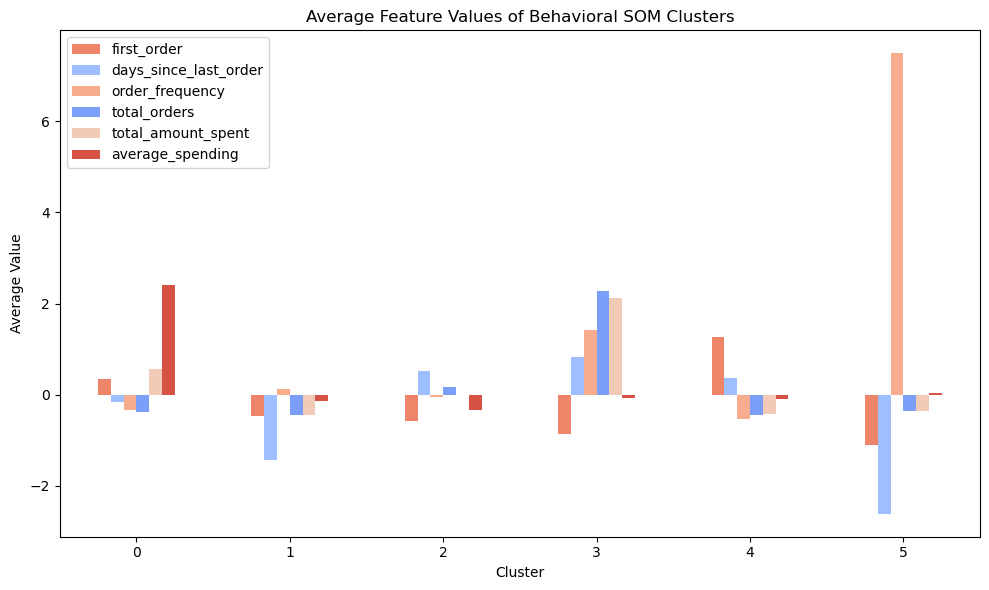

In [277]:
features = ['first_order','days_since_last_order', 'order_frequency', 'total_orders', 
            'total_amount_spent', 'average_spending']

# Group by 'som_clusters' and compute the mean
cluster_means = df_behaviors[features + ['som_cluster']].groupby('som_cluster').mean()

# Use coolwarm colormap to color the bars
cmap = cm.coolwarm
first_order_color = cmap(0.8)
days_since_last_order_color = cmap(0.3)
order_frequency_color = cmap(0.7)
total_orders_color = cmap(0.2)
total_amount_spent_color = cmap(0.6)
average_spending_color = cmap(0.9)

colors = [first_order_color, days_since_last_order_color, order_frequency_color,
          total_orders_color, total_amount_spent_color, average_spending_color]

# Plotting the bar plot
ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Behavioral SOM Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Analysing the appropriateness of our solution using R²

In [278]:
# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_behaviors)  # get total sum of squares
ssw_labels = df_behaviors[behaviors_columns + ['som_cluster']].groupby('som_cluster').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
round(r2, 3)

0.713

### K-Means

In [ ]:
used_features = ['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption', 
                 'first_order', 'days_since_last_order', 'order_frequency', 'total_orders', 
                 'total_amount_spent', 'average_spending']

In [ ]:
kmclust = KMeans(n_clusters=8, init='random', n_init=9, random_state=1)

In [ ]:
kmclust.fit(df[used_features])

KMeans(init='random', n_init=9, random_state=1)

In [ ]:
kmclust.predict(df[used_features])

array([7, 7, 7, ..., 4, 6, 6], dtype=int32)

In [ ]:
pd.DataFrame(kmclust.transform(df[used_features]))

0          1          2          3          4          5  \
0      22.345243  23.233201  23.126744  22.617756  23.632062  23.520353   
1      22.231914  23.245691  23.056564  22.627105  23.762214  23.649796   
2      22.519983  23.392114  23.165341  22.612104  23.721182  23.728940   
3      11.120089  11.639014  11.582209  10.887424  12.151018  11.993947   
4      11.363811  11.828174  12.042440  11.281284  12.262634  11.825615   
...          ...        ...        ...        ...        ...        ...   
31396   6.704280   4.507920   4.135410   4.491139   3.493334   5.325085   
31397   6.701249   4.503358   4.133426   4.488005   3.487949   5.313499   
31398   6.754954   4.211065   5.140121   5.043705   2.404423   3.326181   
31399   6.596955   4.380172   4.538104   4.658705   3.468224   3.508448   
31400   6.704799   4.506006   4.160061   4.523653   3.485049   5.264117   

               6          7  
0      23.708885  15.689828  
1      23.692186  15.710633  
2      23.672565  15.714321  
3      12.270219   3.999900  
4      12.677716   4.868915  
...          ...        ...  
31396   1.942714   9.577601  
31397   1.935987   9.575885  
31398   3.443820   9.753033  
31399   2.385703   9.609927  
31400   1.937962   9.598724  

[31401 rows x 8 columns]

In [ ]:
kmclust = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df[used_features])

KMeans(n_init=15, random_state=1)

In [ ]:
range_clusters = range(1, 10)

In [ ]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df[used_features])
    inertia.append(kmclust.inertia_) 

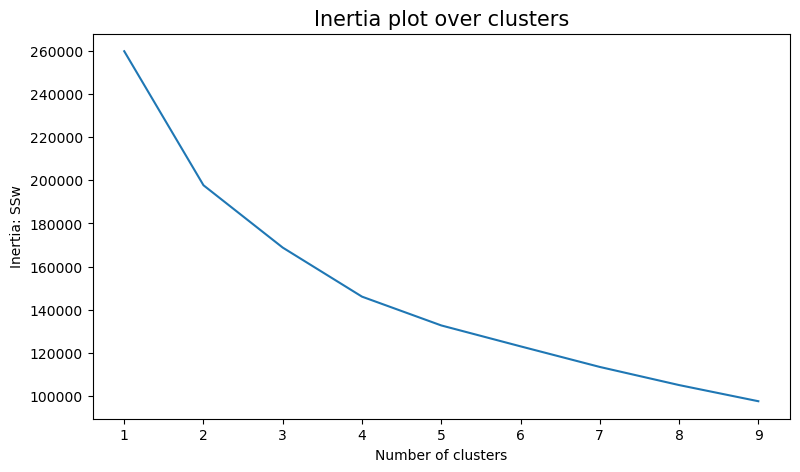

In [ ]:
# The inertia plot

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.23197985213066072
For n_clusters = 3, the average silhouette_score is : 0.2223366639642961
For n_clusters = 4, the average silhouette_score is : 0.21874055110752522
For n_clusters = 5, the average silhouette_score is : 0.20998302005804392
For n_clusters = 6, the average silhouette_score is : 0.21207533632026385
For n_clusters = 7, the average silhouette_score is : 0.21725935992616333
For n_clusters = 8, the average silhouette_score is : 0.2006498126008486
For n_clusters = 9, the average silhouette_score is : 0.20606034302755977


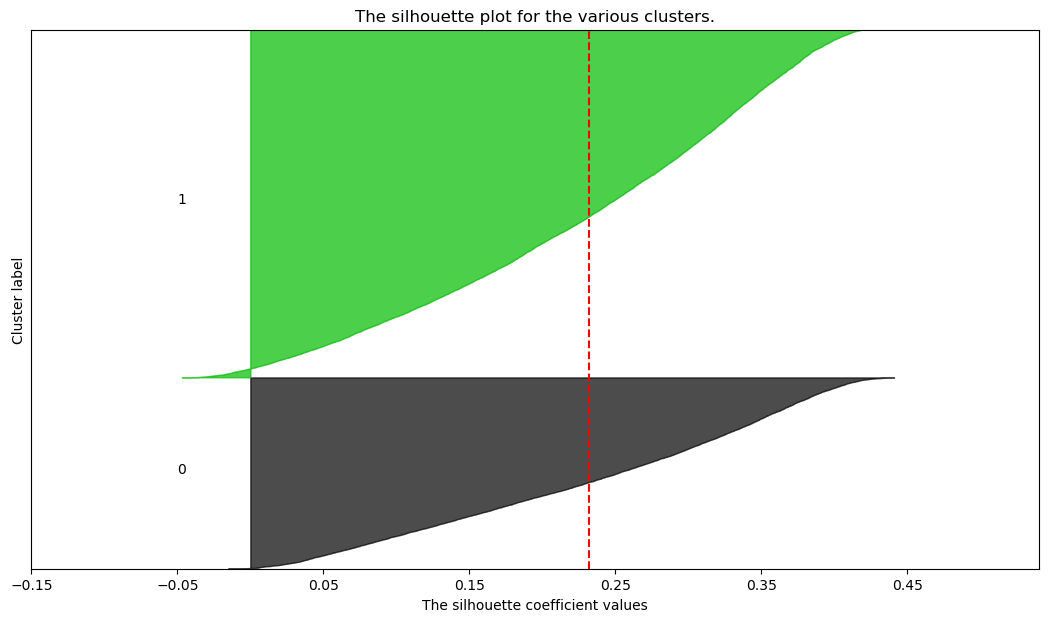

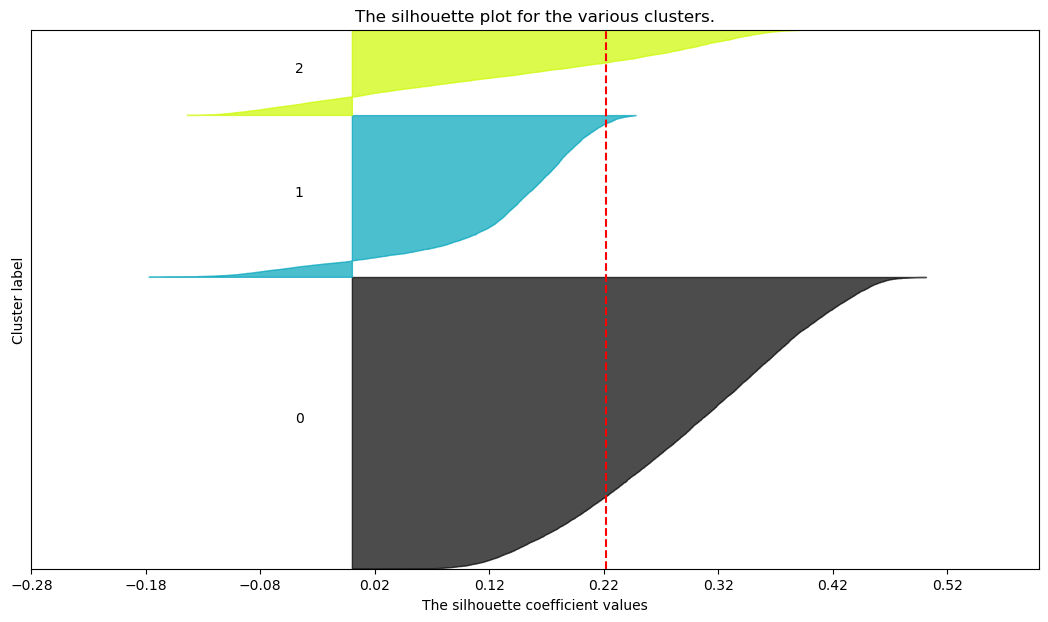

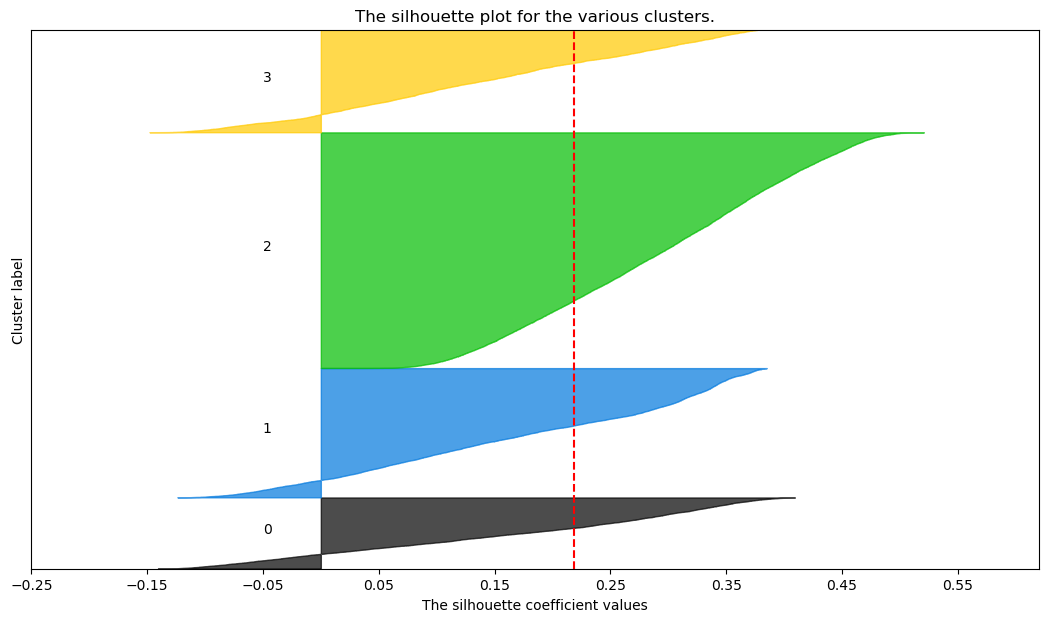

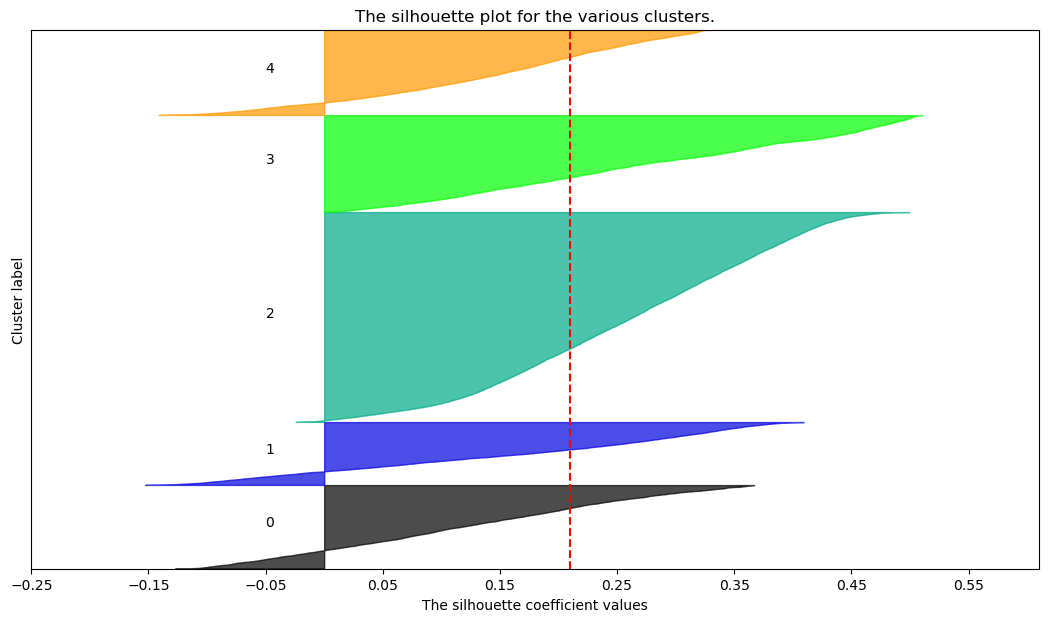

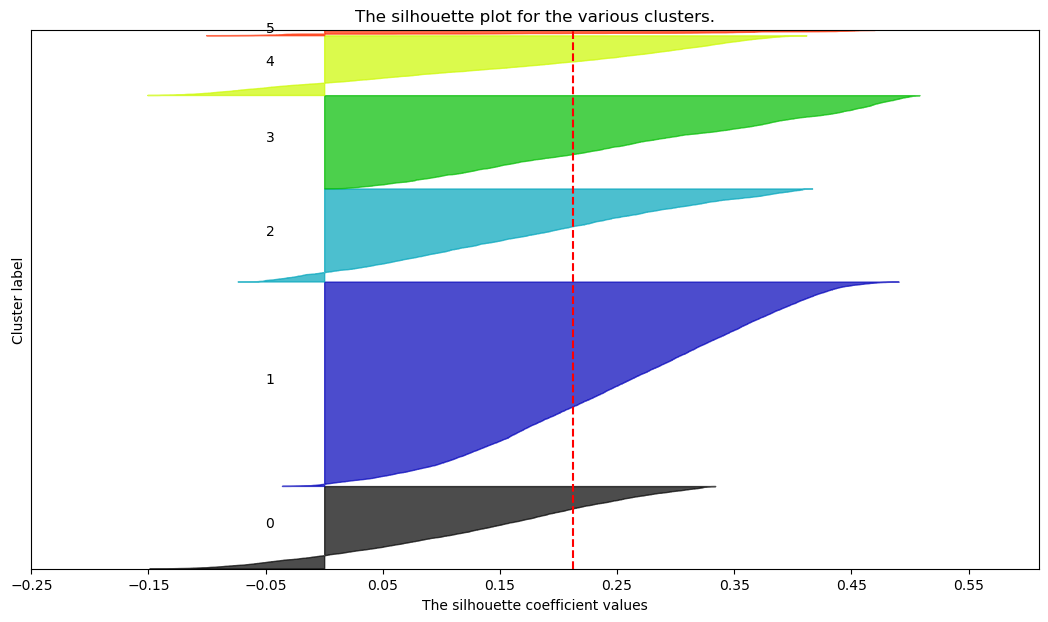

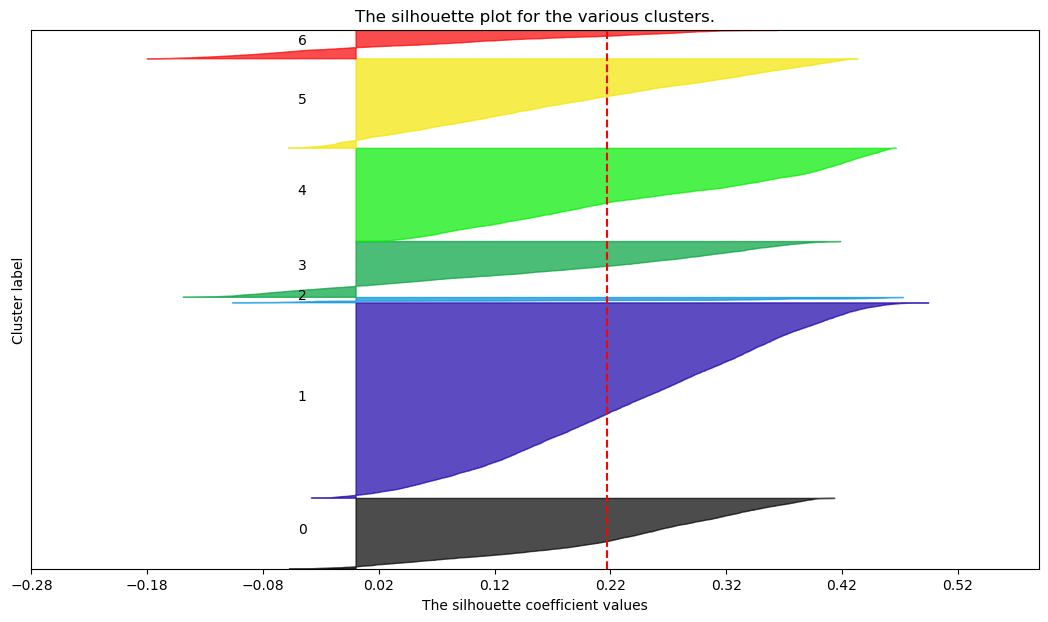

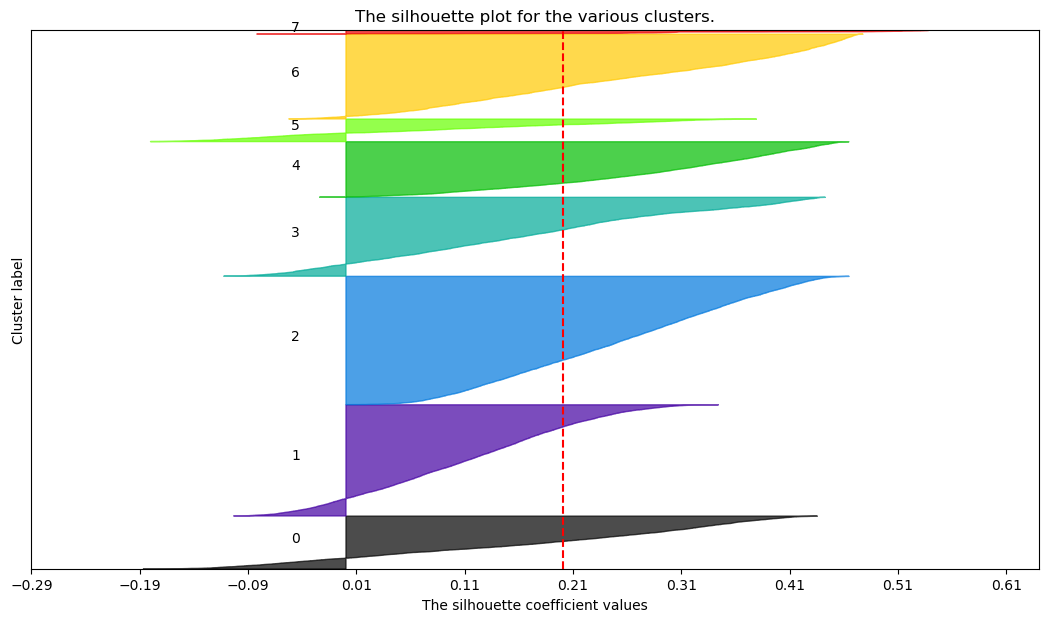

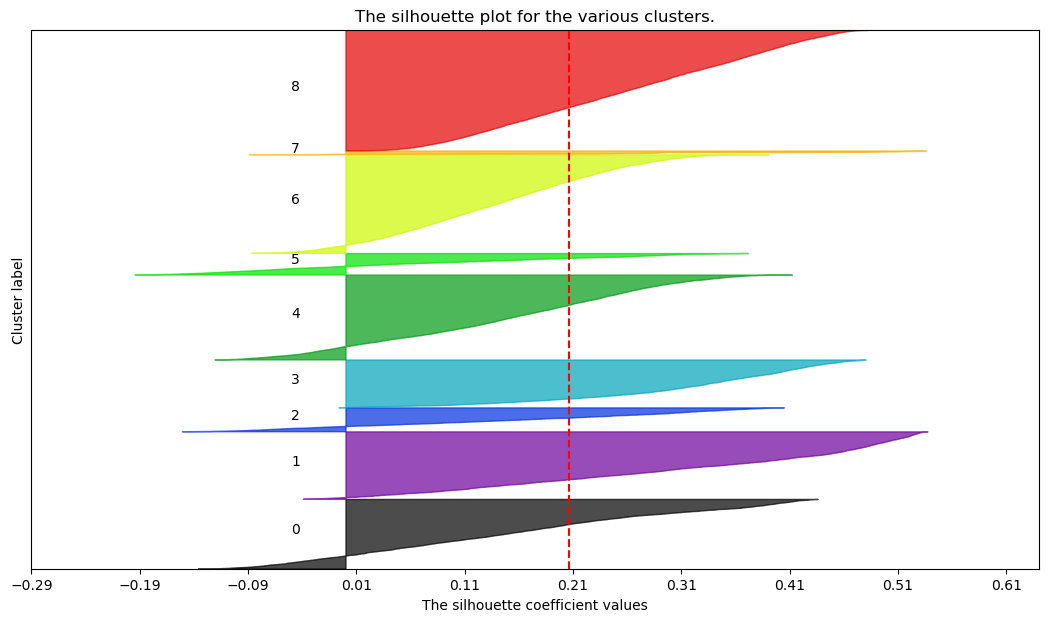

In [ ]:
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df[used_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df[used_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df[used_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[used_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

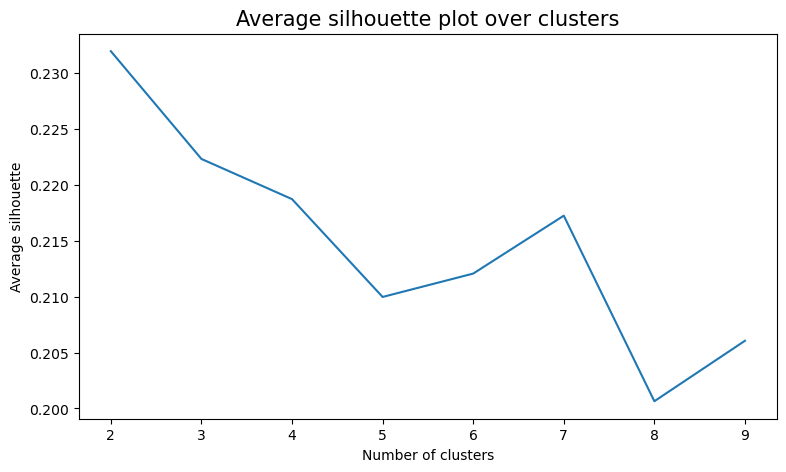

In [ ]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))


#  Why range_clusters[1:] ? 
# Remember we skipped k=1 in the cell above

plt.plot(range_clusters[1:], ## Plot X-axis; 
         avg_silhouette)     ## Plot Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [ ]:
# final cluster solution
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(df[used_features])
km_labels

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
# Characterizing the final clusters
df_concat = pd.concat((df[used_features], pd.Series(km_labels, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

vendor_loyalty_score  relative_cuisine_variety  chain_consumption  \
labels                                                                      
0                  -0.430014                 -0.001272           0.112068   
1                   1.367445                 -0.839749          -0.181004   
2                  -1.080881                  1.519897          -0.039273   

        first_order  days_since_last_order  order_frequency  total_orders  \
labels                                                                      
0         -0.128827               0.117272        -0.157453     -0.145814   
1          0.648698              -0.555204        -0.337513     -0.580777   
2         -0.754731               0.617936         1.022771      1.360976   

        total_amount_spent  average_spending  
labels                                        
0                -0.216411         -0.247011  
1                -0.426116          0.435551  
2                 1.347392          0.025134

### Merging Perspectives